In [4]:
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.corpus import conll2002
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, TimeDistributed, Dropout, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [5]:
nltk.download("conll2002")
nltk_data = list(conll2002.iob_sents("esp.train"))
words = [word for sent in nltk_data for word, tag, _ in sent]
tags = [tag for sent in nltk_data for _, tag, _ in sent]

[nltk_data] Downloading package conll2002 to /root/nltk_data...
[nltk_data]   Package conll2002 is already up-to-date!


In [6]:
# Preprocess the data
words = list(set(words))
n_words = len(words)

tags = list(set(tags))
n_tags = len(tags)

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
tag2idx['PAD'] = n_tags

In [7]:
X = [[word2idx.get(w, 0) for w, _, _ in sent] for sent in nltk_data]
X = pad_sequences(X, maxlen=100, padding='post')
y = [[tag2idx[t] for _, t, _ in sent] for sent in nltk_data]
y = pad_sequences(y, maxlen=100, padding='post', value=tag2idx["PAD"])
y = [to_categorical(i, num_classes=n_tags+1) for i in y]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
model = Sequential()
model.add(Embedding(input_dim=n_words, output_dim=50, input_length=100))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
out = TimeDistributed(Dense(n_tags+1, activation="softmax"))
model.add(out)

In [13]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history= model.fit(X_train, np.array(y_train), batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
211/211 [==============================] - 29s 118ms/step - loss: 0.0339 - accuracy: 0.9916 - val_loss: 0.0583 - val_accuracy: 0.9834
Epoch 2/5
211/211 [==============================] - 11s 54ms/step - loss: 0.0211 - accuracy: 0.9944 - val_loss: 0.0539 - val_accuracy: 0.9851
Epoch 3/5
211/211 [==============================] - 7s 33ms/step - loss: 0.0146 - accuracy: 0.9959 - val_loss: 0.0534 - val_accuracy: 0.9855
Epoch 4/5
211/211 [==============================] - 6s 29ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0550 - val_accuracy: 0.9856
Epoch 5/5
211/211 [==============================] - 4s 20ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.0560 - val_accuracy: 0.9860


In [14]:
score = model.evaluate(X_test, np.array(y_test))
print("Test loss:", score[0])
print("Test accuracy:", score[1])

27/27 [==============================] - 0s 9ms/step - loss: 0.0593 - accuracy: 0.9852
Test loss: 0.05926361307501793
Test accuracy: 0.985162079334259


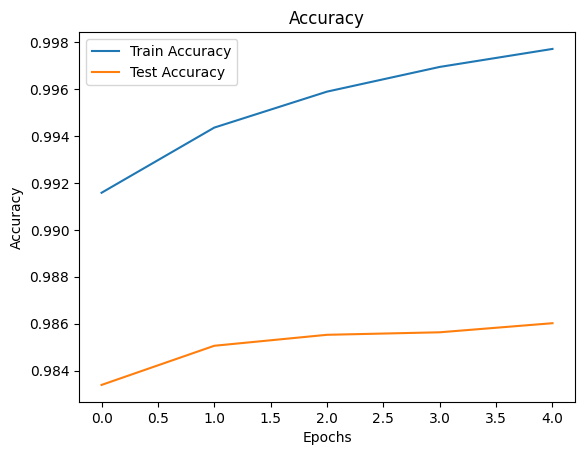

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

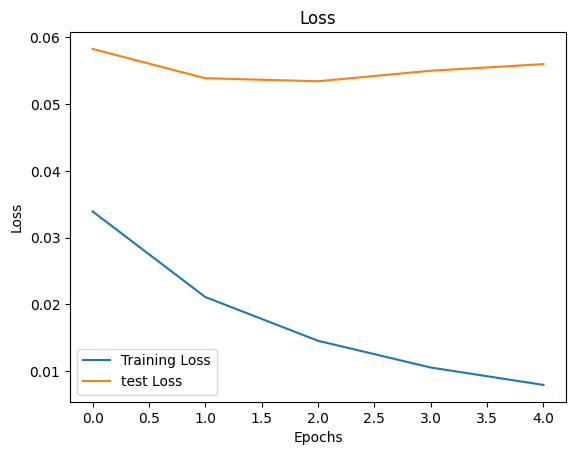

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()